### 鉴定差异表达基因

In [73]:
setwd("~/workspace/jupyter/yeast_data/data/info/")
getwd()

[1] "/home/wangyang/workspace/jupyter/yeast_data/data/info"

In [74]:
count_tab <- read.table("result.csv",header=T)
rownames(count_tab) <- count_tab$gene_id # count_tab[,1]
# 去掉第一列
count_tab <- count_tab[,-c(1)]
# count_tab <- count_tab[c(1,3,4,2,5)]　# 没用？
count_tab <- count_tab[c(1,4,2,3,5)]
head(count_tab)

,EV_4,EV_3,DNMT3B_4,DNMT3B_2,DNMT3B_3
,<int>,<int>,<int>,<int>,<int>
ETS1-1,24,51,18,32,17
ETS1-2,0,0,0,0,0
ETS2-1,0,0,0,0,0
ETS2-2,0,0,0,0,0
HRA1,30,71,14,19,24
ICR1,154,133,177,198,203


In [76]:
colData <- read.table("AccGroup.csv",header=T)
colData$Condition <- factor(colData$Condition,c("EV","DNMT3B"))
colData

sample_id,Condition
<chr>,<fct>
EV_3,EV
EV_4,EV
DNMT3B_2,DNMT3B
DNMT3B_3,DNMT3B
DNMT3B_4,DNMT3B


### 差异表达基因
1. log2FoldChange 差异倍数取log
2. pvalue
3. padj值越小，说明基因可能是差异表达

In [77]:
library(DESeq2)
dds <- DESeqDataSetFromMatrix(countData = count_tab,
                              colData = colData,
                              design= ~  Condition)
#(nor_count <- counts(dds))

In [78]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [79]:
# 将res转换为dataframe
resultsNames(dds) # lists the coefficients
res <- results(dds, name="Condition_DNMT3B_vs_EV")
res <- res[order(res$padj),]
resDF <- as.data.frame(res)
class(resDF)

#resDF
resDF$gene_id <- rownames(resDF) # 添加一列gene_id
resDF <- resDF[,c(7,1,2,3,4,5,6)] # 将gene_id放到第一列

head(resDF)
write.table(resDF,file="yeast_DESeq2_DEG.txt",sep="\t",quote=F,row.names=F)
# or to shrink log fold changes association with condition:
# res <- lfcShrink(dds, coef="condition_trt_vs_untrt", type="apeglm")

[1] "Intercept"              "Condition_DNMT3B_vs_EV"

[1] "data.frame"

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
YGL009C,YGL009C,37238.9226,-4.529624,0.2740966,-16.52565,2.398399e-61,1.519146e-57
YKL120W,YKL120W,2230.6554,-4.030774,0.2519001,-16.00148,1.247727e-57,3.951553e-54
YOR226C,YOR226C,594.3874,-3.018230,0.1948892,-15.48690,4.252942e-54,8.979378e-51
YHR208W,YHR208W,13975.7921,-3.309711,0.2269014,-14.58656,3.420033e-48,5.415623e-45
YCL018W,YCL018W,7781.0195,-3.178588,0.2327366,-13.65745,1.822574e-42,2.308836e-39
YLR355C,YLR355C,29121.5579,-2.157462,0.1668011,-12.93434,2.880789e-38,3.041153e-35


### PCA

In [80]:
vsd <- vst(dds,blind=FALSE) # 数据均一化
vsd

class: DESeqTransform 
dim: 7127 5 
metadata(1): version
assays(1): ''
rownames(7127): ETS1-1 ETS1-2 ... tY(GUA)O tY(GUA)Q
rowData names(22): baseMean baseVar ... maxCooks dispFit
colnames(5): EV_4 EV_3 DNMT3B_4 DNMT3B_2 DNMT3B_3
colData names(3): sample_id Condition sizeFactor

Saving 6.67 x 6.67 in image



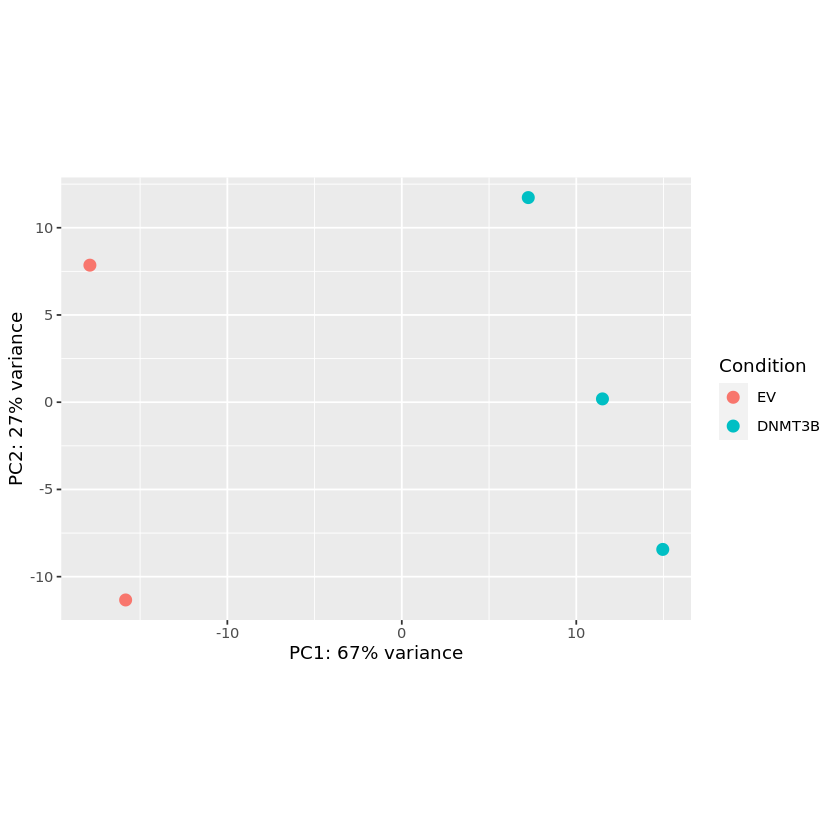

In [81]:
library('ggplot2')
pcaData <- plotPCA(vsd, intgroup=c("Condition"), returnData=TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
plot_fig <- ggplot(pcaData, aes(PC1, PC2, color=Condition)) +
  geom_point(size=3) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) + 
  coord_fixed()
# 保存图片
ggsave(plot_fig,filename = "yeast_DESeq2_PCA.pdf")
plot_fig

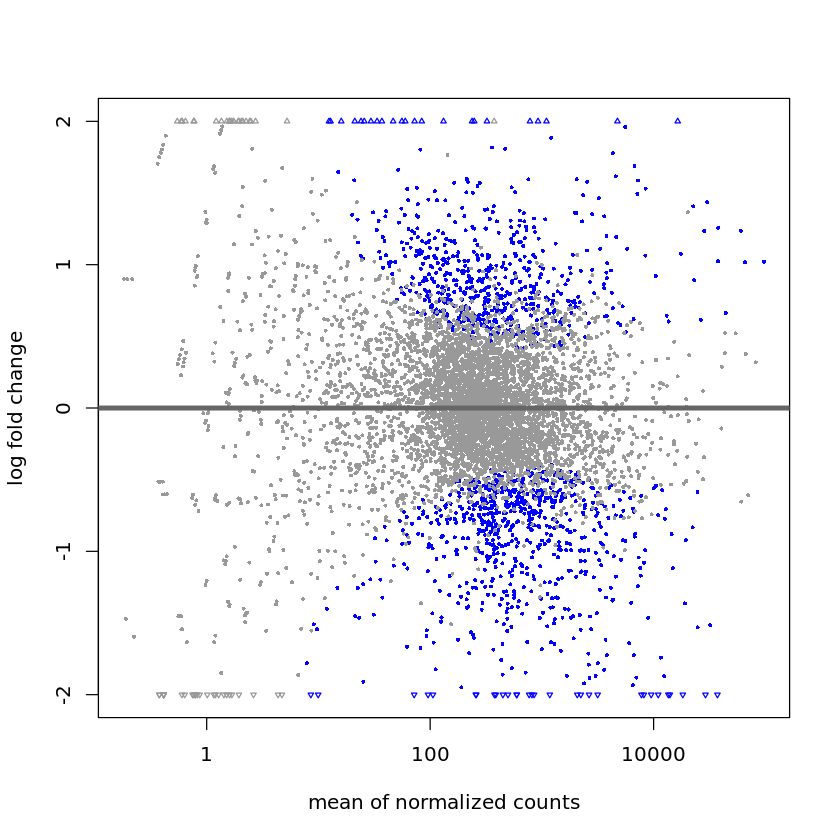

In [71]:
# pdf("yesat_DESeq2_MAplot.pdf")
test <- plotMA(res, ylim=c(-2,2))
# dev.off()